<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Experiments and Hypothesis Testing
<br><br>
_Instructor:_ Tim Book, General Assembly DC

---

<a id="learning-objectives"></a>
### Learning Objectives
- Explain the difference between causation and correlation.
- Determine causality and sampling bias using directed acyclic graphs.
- Identify what missing data is and how to handle it.
- Test a hypothesis using a sample case study.

### Lesson Guide
- [Data Source](#data-source)
	- [What Are the Features/Covariates/Predictors?](#what-are-the-featurescovariatespredictors)
	- [What Is the Outcome/Response?](#what-is-the-outcomeresponse)
	- [What Do You Think Each Row in the Data Set Represents?](#what-do-you-think-each-row-in-the-dataset-represents)
- [Math Review](#math-review)
	- [Covariance](#covariance)
	- [Correlation](#correlation)
	- [The Variance-Covariance Matrix](#the-variance-covariance-matrix)
- [Causation and Correlation](#causation-and-correlation)
	- [Structure of Causal Claims](#structure-of-causal-claims)
	- [Why Do We Care?](#why-do-we-care)
	- [How Do We Determine if Something is Causal?](#how-do-we-determine-if-something-is-causal)
- [The Pearlean Causal DAG Model](#pearlean-causal-dag-model)
	- [What Is a DAG?](#what-is-a-dag)
	- [X Causes Y](#its-possible-that-x-causes-y)
	- [Y Causes X](#y-causes-x)
	- [The Correlation Between X and Y Is Not Statistically Significant](#the-correlation-between-x-and-y-is-not-statistically-significant)
	- [X or Y May Cause One or the Other Indirectly Through Another Variable](#x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable)
	- [There is a Third Common Factor That Causes Both X and Y](#there-is-a-third-common-factor-that-causes-both-x-and-y)
	- [X and Y Cause a Third Factor, But Our Data Collect the Third Factor Unevenly](#both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly)
	- [Controlled Experiments](#controlled-experiments)
	- [When Is it OK to Rely on Association?](#when-is-it-ok-to-rely-on-association)
	- [How Does Association Relate to Causation?](#how-does-association-relate-to-causation)
- [Sampling Bias](#sampling-bias)
	- [Forms of Sampling Bias](#forms-of-sampling-bias)
	- [Problems From Sampling Bias](#problems-from-sampling-bias)
	- [Recovering From Sampling Bias](#recovering-from-sampling-bias)
    - [Stratified Random Sampling](#stratified-random-sampling)
- [Missing Data](#missing-data)
	- [Types of Missing Data](#types-of-missing-data)
	- [De Minimis](#de-minimis)
	- [Class Imbalance](#class-imbalance)
    - [Relation to Machine Learning](#relation-to-machine-learning)
- [Introduction to Hypothesis Testing](#introduction-to-hypothesis-testing)
	- [Validate Your Findings](#validate-your-findings)
	- [Confidence Intervals](#confidence-intervals)
	- [Error Types](#error-types)
- [Scenario](#scenario)
	- [Exercises](#exercises)
	- [Statistical Tests](#statistical-tests)
	- [Interpret Your Results](#interpret-your-results)

<a id="data-source"></a>
## Data Source

---

Today, we’ll use advertising data from an example in the book [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).
- This is a well-known, standard introduction to machine learning.
- The book has a more advanced version — [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) — if you are comfortable with linear algebra and statistics at the graduate level.

#### Code-Along: Bring in Today's Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [3]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)

In [4]:
# Examine the data with .head(). 
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

<a id="what-are-the-featurescovariatespredictors"></a>
### What are the Features/Covariates/Predictors?

In [5]:
# Answer:
"""
TV: Advertising budget 
Radio: Advertising budget
Newspaper: Advertising budget
"""

'\nTV: Advertising budget \nRadio: Advertising budget\nNewspaper: Advertising budget\n'

<a id="what-is-the-outcomeresponse"></a>
### What Is the Outcome/Response?

In [6]:
# Answer:
# Sales: Product sales in a given market

<a id="what-do-you-think-each-row-in-the-dataset-represents"></a>
### What Do You Think Each Row in the Data Set Represents?

In [7]:
# Answer: 
#Each row is a media market (geographic location)

<a id="math-review"></a>
## Math Review
---

<a id="covariance"></a>
### Covariance

Covariance is a measure of the joint variability between two random variables.

You can think of this as a measure of linear association. If you have a variance of Y and a variance of X, the covariance is the amount of variance they share.

$$\text{Cov}(X, Y) = \frac {\sum{(x_i - \bar{X})(y_i - \bar{Y})}} {n}$$

#### The math can be a bit intimidating, but I show it only to ask these two questions:

* When will covariance be positive? If differences are both possitive, (x_i - \bar{X})(y_i - \bar{Y}, product is positive

* When will covariance be negitive? If differences are both negitive, (x_i - \bar{X})(y_i - \bar{Y}, product is positive

* If moving in oppotive direction, the product is negitive

* How will outliers affect covariance? Sensitive to outliers

**Covariance Expressed Using Matrix Notation**

$$\text{Cov}(\mathbf{X}, \mathbf{Y}) = \mathbb{E}[(\mathbf{X}-\mathbb{E}[\mathbf{X}])(\mathbf{Y}-\mathbb{E}[\mathbf{Y}])]$$

**A Useful Special Case (Used Below)**

$$\text{Cov}(X, X) = \frac {\sum{(x_i - \bar{X})^2}} {n} = \text{Var}(X) = \sigma_X^2$$

<a id="correlation"></a>
### Correlation

While covariance is a useful measure, it can be difficult to compare covariances, as they are not standardized. 

Instead we can use the correlation, which measures the same effect but reports it as a range from -1 to 1. 1 represents perfect covariance and correlation, 0 represents no correlation, and -1 one represents perfect inverse correlation.

$$\text{Corr}(X,Y) = \frac {\text{Cov}(X,Y)} {\sigma_X\sigma_Y} = \frac {\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]} {\sigma_X\sigma_Y}$$

Note that the variance is always positive, making the denominator positive. So, the sign of the covariance between $X$ and $Y$ is the same as the sign of their correlation! 

The following visual examples better illustrate how correlation refers to how $X$ and $Y$ change together. Notice that a correlation number by itself is not always indicative of the relationship between the variables — always try to supplement 2-D correlation with a visual!

![](assets/images/correlation_examples.png)

<a id="the-variance-covariance-matrix"></a>
### The Variance-Covariance Matrix

If you have many $x$-variables, it's common to organize covariances into a **var-covar matrix** (sometimes just called a **covariance matrix**).

Given $n$ features from $X_1$ to $X_n$, the variance-covariance matrix looks like this (recall that $cov(X, X) = var(X)$):

$$
\mathbf{\Sigma} = 
\left[ \begin{array}{c}
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_n)  \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_n)  \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n,X_1) & \text{Cov}(X_n,X_2) & \cdots & \text{Var}(X_n)
\end{array} \right]
$$

But... still not useful right? We can't read covariances easily. So it's also common to have a **correlation matrix**:

$$
\mathbf{R} = 
\begin{bmatrix}
1 & \text{Corr}(X_1, X_2) & \cdots & \text{Corr}(X_1, X_n) \\
\text{Corr}(X_2, X_1) & 1 & \cdots & \text{Corr}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Corr}(X_n, X_1) & \text{Corr}(X_n, X_2) & \cdots & 1 \\
\end{bmatrix}
$$

#### Calculate the var-covar matrix using the DataFrame's built-in `.cov()` method:

In [8]:
# Answer: Var covar Matrix
data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


#### Calculate the correlation matrix using the DataFrame's built-in `.corr()` method:

In [9]:
# Answer:Correlation Matrix , 1 when comparing the same variable 
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


When we have a large amount of data, the correlation matrix may be too difficult to read. It can help to make a plot.

#### Use Seaborn's `.heatmap()` function to make a plot of the correlation matrix.

- Remember that we imported Seaborn as `sns`.
- To make a correlation matrix from a DataFrame, try `my_df.corr()`.

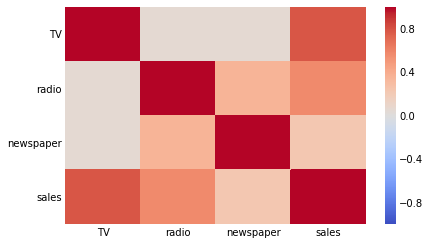

In [10]:
# Answer: Heat map of the Correalation Matrix  
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1);

Of course, looking at linear association doesn't show us the whole picture. We can get a more detailed look with a scatterplot matrix.

#### Use Seaborn's `.pairplot()` function to make joint scatterplots of the data.

- See if you can guess or [figure out](http://seaborn.pydata.org/generated/seaborn.pairplot.html) how `pairplot()` might work.
- `pairplot()` plots each column against each column of a DataFrame. So, at the minimum you must have to pass in the DataFrame you want to analyze!

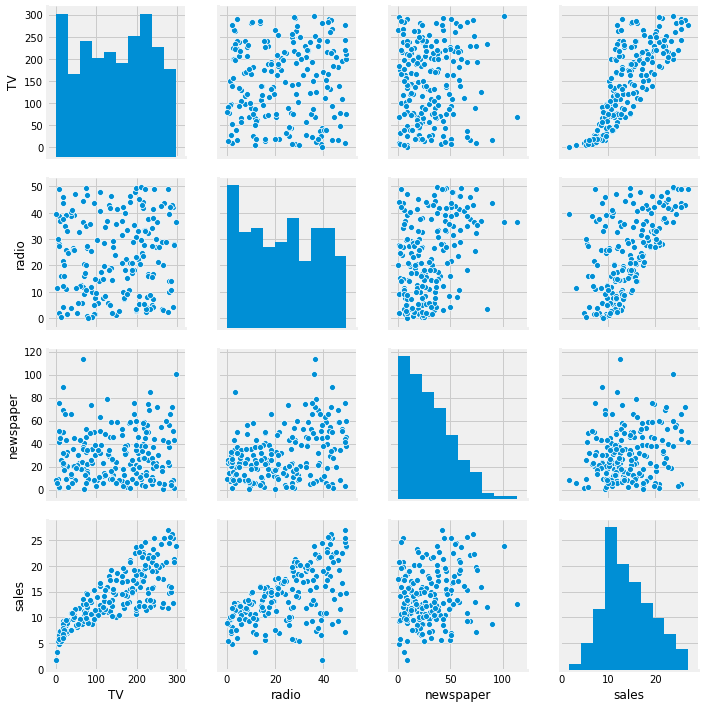

In [12]:
# Answer: Scatterplot Matrix, adding ; takes away the file 
sns.pairplot(data);

<a id="causation-and-correlation"></a>
## Causation and Correlation
---

**Objective**: Explain the difference between causation and correlation.

- Think of various examples of studies you’ve seen in the media related to food:
    - "[Study links coffee consumption to decreased risk of colorectal cancer](https://news.usc.edu/97761/new-study-links-coffee-consumption-to-decreased-risk-of-colorectal-cancer/)"
    - "[Coffee does not decrease risk of colorectal cancer](http://news.cancerconnect.com/coffee-does-not-decrease-risk-of-colorectal-cancer/)"

There's a whole book series based on these [Spurious Correlations](http://www.tylervigen.com/spurious-correlations).

**So, why are these spurious correlations so common?**

- Is it because of sensational headlines?
- There's a neglect of robust data analysis.
- Causal claims and associations are difficult to convey in an unambiguous way.

The food claims above are **correlated** but may or may not be **causal**.

<a id="why-do-we-care"></a>
### Why Do We Care?

- Understanding this difference is critical for executing the data science workflow, especially when identifying and acquiring data.
- We need to fully articulate our question and use the right data to answer it while also considering any **confounders**.

**Confounders** are unobserved variables that could affect the outcome. If we neglect to include confounding variables in an analysis, we could easily produce an inaccurate model.

**Example:** Shark Attacks vs. Ice Cream Sales?

- We don’t want to overstate what our model measures.
- Be careful not to say “caused” when you really mean “measured” or “associated.”

<a id="how-do-we-determine-if-something-is-causal"></a>
### How Do We Determine if Something is Causal?

Considering causal criteria is one approach to assessing causal relationships.

However, it’s hard to define universal causal criteria. **In general, the only true way to really prove something is causal is with a randomized control trial.**

One attempt that's commonly used in the medical field is based on work by Bradford Hill.


He developed a list of “tests” that an analysis must pass in order to indicate a causal relationship:


- Strength of association
- Consistency
- Specificity
- Temporality
- Biological gradient
- Plausibility
- Coherence
- Experiment
- Analogy


**Strength (effect size)**: A small association does not mean that there is not a causal effect, although the larger the association, the more likely the effect is to be causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and a disease with no other likely explanation. The more specific an association between a factor and an effect, the greater the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and, if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Biological gradient**: Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Coherence**: Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations."

**Experiment**: "Occasionally it is possible to appeal to experimental evidence."

**Analogy**: The effect of similar factors may be considered.

<a id="pearlean-causal-dag-model"></a>
## The Pearlean Causal Directed Acyclic Graph (DAG) Model

---
### Some Quick Background Notes:

- This model is a visual tool to help us reason about causality and association.
- It was proposed by Judea Pearl, although there are many similar models.
- We will only scratch the surface, so look into other resources if you're interested in learning more.
    - We'll cover the basic idea and most notable cases.
    - We won't talk about the formal mathematics or underlying probability, or how to use d-seperation to infer causality.

<a id="what-is-a-dag"></a>
### What Is a DAG?
- DAG stands for directed acyclic graph; it's a collection of nodes connected by lines. 
- Each line has an arrow to point in a direction.
- If you follow the arrows, you reach a final node. There are no loops.

A single circle or node in a causal DAG represents an event; something that happens at one point in time.

![](./assets/images/dag1.png)

Let's pretend random variables X and Y — or two different types of events — are correlated with each other.

**What are the possible causal structures that would produce this correlation?**

- X causes Y.
- Y causes X.
- There is no actual causation.
- X or Y indirectly causes the other.
- There is a third factor that causes both.
- X and Y cause a third factor, but our data collect the third factor unevenly. (We won't go into this)

<a id="its-possible-that-x-causes-y"></a>
### X causes Y.
![](./assets/images/x-cause-y.png)

<a id="y-causes-x"></a>
### Y causes X.
![](./assets/images/y-cause-x.png)

<a id="the-correlation-between-x-and-y-is-not-statistically-significant"></a>
### There is no causality between X and Y
![](./assets/images/xy.png)

<a id="x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable"></a>
### X or Y may cause one or the other indirectly through another variable.
![](./assets/images/x-c-z-y.png)

<a id="there-is-a-third-common-factor-that-causes-both-x-and-y"></a>
### There is a third common factor that causes both X and Y.
![](./assets/images/z-cause-xy.png)

### What does confounding look like?

Let’s say we performed an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer?

As we've noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.
![](./assets/images/smoke-lighter-cancer.png)

If we believe the structure above, conditioning on smoking by only looking at non-smokers removes the correlation between lighters and cancer.

<a id="controlled-experiments"></a>
### Controlled Experiments

- The most foolproof way to measure an effect is to control all of the confounders and directly intervene and control our variable of interest. 
    * This typically means having a **placebo** or **control** variables.
- This way we know that any correlation we find is not because of the confounders but instead because of the variable we control. 
- This also means that all the effects we see are due to the variable we control.
- However, experiments are not always possible and take longer than using observational data.

<a id="when-is-it-ok-to-rely-on-association"></a>
### When Is it OK to Rely on Association?

- **When all you need is a predictive model**
    - Oftentimes, all you need to answer your question is to _use_ the association to predict an outcomes. You don't care about the causal relationship.
    
- **When correlation is causal.**
    - If you are sure there are no confounding factors or selection bias, then that association might be a causation (risky).
    - It's OK to exclude confounders that have very unlikely or small effects.

### Code-Along: Explore the Associations in the Advertising Data

#### Visualize the relationship between the features and the response using scatterplots.

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. 
- Using this as an example, can you also make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`?
- `axs[0]` is the first coordinate grid, `axs[1]` is the second coordinate grid, etc.

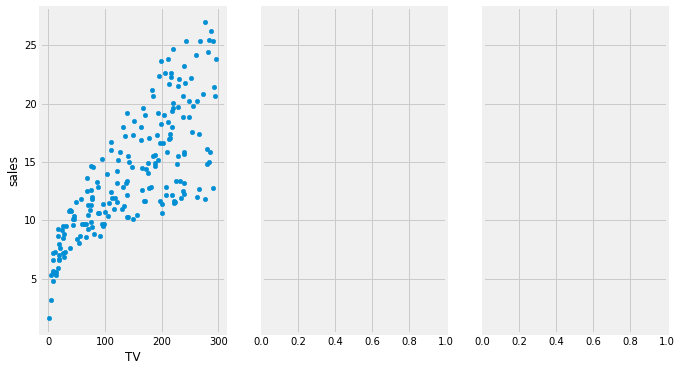

In [13]:
# Visualize the relationship between the features and the response using scatterplots:
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(10, 6));

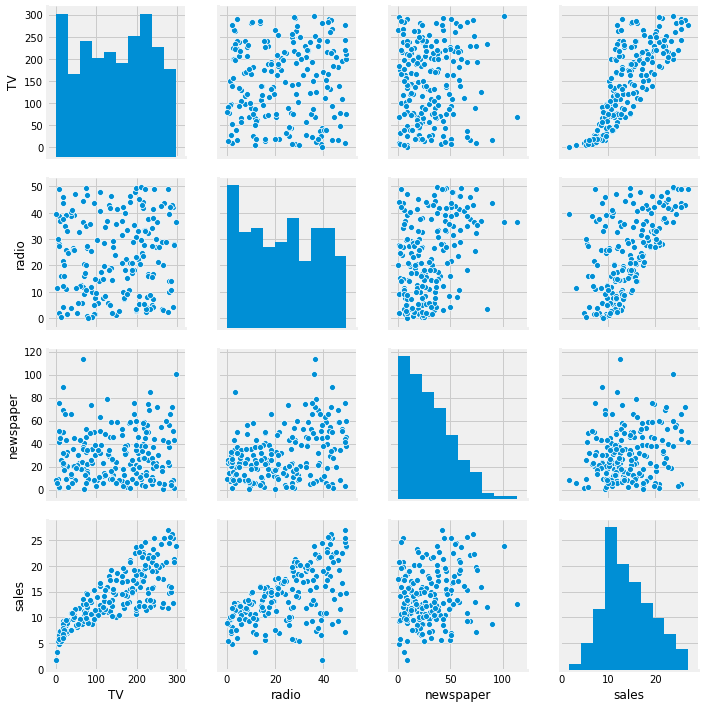

In [14]:
sns.pairplot(data)

#### Is there a relationship between ads and sales? Which type of ads?

In [ ]:
# Answer: Yes, but depends on ad type. Between TV and radio yes, newspaper no.

#### Can we say this a causal relationship?

In [ ]:
# Answer: Have to check the list. Based on evidence we can't. We need other types of studies. Right now its purly observational 

#### What other questions might we want to know about this data?

In [ ]:
# Answer: More studies to review relationship between ad type and sales

### Section Summary

1) **It's importlant to have deep subject area knowledge.** You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be wrong.

2) **A DAG (directed acyclic graph) can be a handy tool for thinking through the logic of your models.**

3) **There is a distinction between causation and correlation.** In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent — especially in cutting-edge fields where there are many other unknown variables.

4) **Good data are essential.** Throughout this course we will be developing your data intuition so you can spot gaps and bias more readily. You'll also be introduced to tools that can help. However, your analysis is only as good as your understanding of the problem and the data.

## _Lesson Break_